### ideas:  
    Factor analysis
    PCA

### Problemas  
- Muchos NAN.
- Muchas categoricas.
- 

# Data exploration and visualizations.  
Pablo Osorio, Juliana Vallejo, Camila Vásquez.

[kaggle competition](https://www.kaggle.com/c/ieee-fraud-detection/overview)  
### Data description
[Data in kaggle competition](https://www.kaggle.com/c/ieee-fraud-detection/data)  
[Data Description (Details and Discussion)](https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203)

### Important notebooks
[kaggle notebook motivation](https://www.kaggle.com/artgor/eda-and-models/data)

#### Data description
- **TransactionDT**: timedelta from a given reference datetime (not an actual timestamp)
- **TransactionAMT**: transaction payment amount in USD
- **ProductCD**: product code, the product for each transaction
- **card1 - card6**: payment card information, such as card type, card category, issue bank, country, etc.
- **addr**: address
- **dist**: distance
- **P_ and (R__) emaildomain**: purchaser and recipient email domain
- **C1-C14**: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
- **D1-D15**: timedelta, such as days between previous transaction, etc.
- **M1-M9**: match, such as names on card and address, etc.
- **Vxxx**: Vesta engineered rich features, including ranking, counting, and other entity relations.

##### Categorical Features:
ProductCD  
card1 - card6  
addr1, addr2  
Pemaildomain Remaildomain  
M1 - M9  

In [1]:
from utilities import plot_counts_and_proportion

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline 

## Data read

Since train identity table is considerably shorter than train transaction table, and merging them will result in a incredibly high ratio of NANs then we have decided to just use transaction table.

In [2]:
folder_path = '../input/'

# Train
train_transaction = pd.read_csv(f'{folder_path}train_transaction.csv', nrows=30000)
X, y = train_transaction.drop('isFraud', axis=1), train_transaction['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Submission
submission_transaction = pd.read_csv(f'{folder_path}test_transaction.csv', nrows=2500)
# sub = pd.read_csv(f'{folder_path}sample_submission.csv')
# train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

In [3]:
print(f'''
X_train shape:  {X_train.shape},
y_train shape: {y_train.shape}

Percentaje of fraud, No fraud {(y_train.value_counts(normalize=True, ascending=True)).values}


X_train caracterization:
    Number of columns with one NAN:    {X_train.isna().any(axis=0).sum()}
    Number of rows with one NAN:       {X_train.isna().any(axis=1).sum()}
       
Columns withouth NAN:
{X_train.columns[X_train.notna().all().tolist()]}''')


X_train shape:  (24000, 393),
y_train shape: (24000,)

Percentaje of fraud, No fraud [0.02879167 0.97120833]


X_train caracterization:
    Number of columns with one NAN:    319
    Number of rows with one NAN:       24000
       
Columns withouth NAN:
Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
       'C11', 'C12', 'C13', 'C14', 'D1', 'V95', 'V96', 'V97', 'V98', 'V99',
       'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108',
       'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117',
       'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126',
       'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135',
       'V136', 'V137', 'V281', 'V282', 'V283', 'V288', 'V289', 'V296', 'V300',
       'V301', 'V313', 'V314', 'V315'],
      dtype='object')


In [4]:
X_train.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
21753,3008753,575279,57.95,W,4806,490.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,2987251,90365,100.00,W,10057,225.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22941,3009941,592678,57.95,W,16115,431.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,2987618,97449,5.40,C,13346,118.0,185.0,visa,226.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17090,3004090,446891,269.95,W,16255,470.0,150.0,mastercard,137.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
y_train.head()

21753    0
251      0
22941    0
618      0
17090    0
Name: isFraud, dtype: int64

### Data correction and droping not relevant features


#### Not relevant
- **addr**: address
- **dist**: distance
- **P_ and (R__) emaildomain**: purchaser and recipient email domain
- **D2-D15**: timedelta, such as days between previous transaction, etc. All except first one.


#### Correction
Still deciding in *M1*
M1-M9: match, such as names on card and address, etc.
¿Could I replace NANs with False, or maybe simply renaming Nans to other name?

In [6]:
irrelevant_vars = set(['addr1', 'addr2', 'dist1', 'dist2', 
            'P_emaildomain', 'R_emaildomain', *[f'D{i}' for i in range(2,16)],
                  *[f'M{i}' for i in range(1,10)]])
X_train.drop(labels=irrelevant_vars, axis=1, inplace=True)

/home/pablo-ubuntu/anaconda3/envs/ML/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [101]:
train_transaction['P_emaildomain']

0                NaN
1          gmail.com
2        outlook.com
3          yahoo.com
4          gmail.com
            ...     
29995      gmail.com
29996      gmail.com
29997      gmail.com
29998            NaN
29999    comcast.net
Name: P_emaildomain, Length: 30000, dtype: object

In [102]:
categorical_vars = set(['ProductCD', *[f'card{i}' for i in range(1,7)]]) 
#                    *[f'M{i}' for i in range(1,10)]
#                      'P_emaildomain', 'R_emaildomain', 'addr1', 'addr2']])

continuous_vars = X_train.columns.difference(categorical_vars)

In [121]:
train_transaction['M7'].value_counts()

F    5145
T     840
Name: M7, dtype: int64

In [107]:
 X_train[continuous_vars]

,C1,C10,C11,C12,C13,C14,C2,C3,C4,C5,...,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99
21753,3.0,0.0,1.0,0.0,7.0,3.0,2.0,0.0,0.0,2.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251,7.0,0.0,4.0,0.0,18.0,7.0,5.0,0.0,0.0,2.0,...,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0
22941,1.0,0.0,1.0,0.0,2.0,1.0,2.0,0.0,0.0,2.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
618,10.0,25.0,10.0,10.0,28.0,4.0,60.0,0.0,48.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
17090,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
860,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15795,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


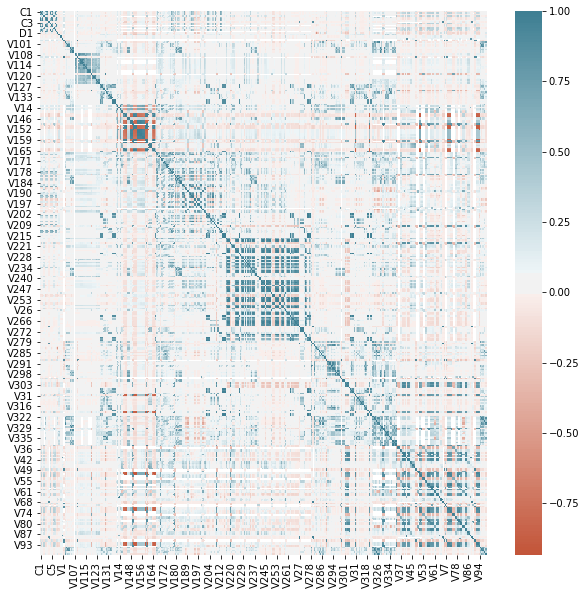

In [111]:
# corr = X_train[continuous_vars].corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr,
                 cmap=sns.diverging_palette(20, 220, n=200))

## Explotarion categorical



So card6 is type of card, card4 is credit card company


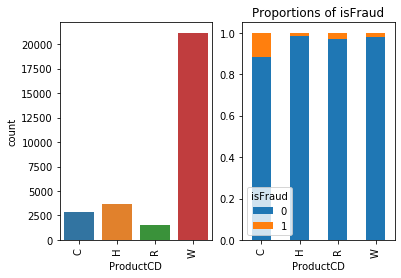

In [8]:
fig = plot_counts_and_proportion(train_transaction, x="ProductCD", hue="isFraud")

The product code C directly raises the probability of Fraud

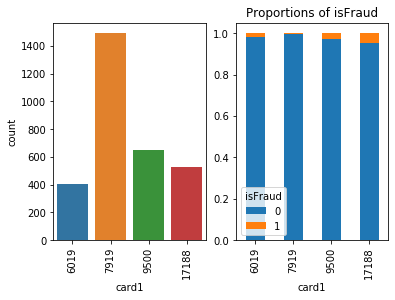

In [10]:
fig = plot_counts_and_proportion(train_transaction, x="card1", hue="isFraud")

In [123]:
train_transaction['card1'].value_counts()

7919     1491
9500      650
17188     527
6019      405
15066     378
         ... 
5818        1
5786        1
18064       1
9852        1
8236        1
Name: card1, Length: 4091, dtype: int64

The card1 in 7919 greatly reduces the probability of Fraud.

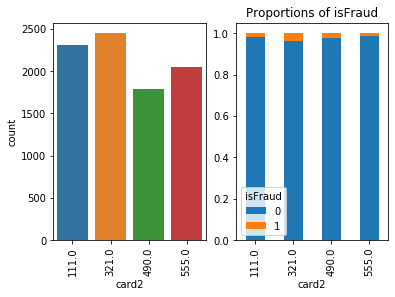

In [11]:
fig = plot_counts_and_proportion(train_transaction, x="card2", hue="isFraud")

card 2 has no apparent effect in probability of fraud

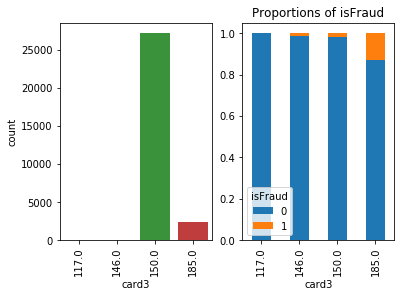

In [12]:
fig = plot_counts_and_proportion(train_transaction, x="card3", hue="isFraud")

card 3 in 185 has apparent effect in probability of fraud

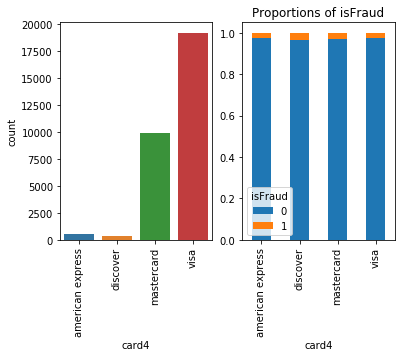

In [13]:
fig = plot_counts_and_proportion(train_transaction, x="card4", hue="isFraud")

card 4 has no apparent effect in probability of fraud

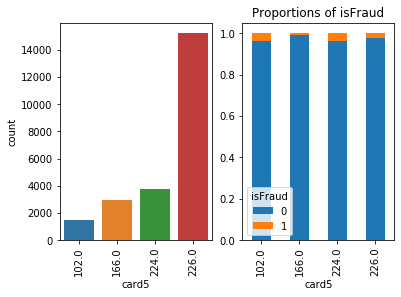

In [14]:
fig = plot_counts_and_proportion(train_transaction, x="card5", hue="isFraud")

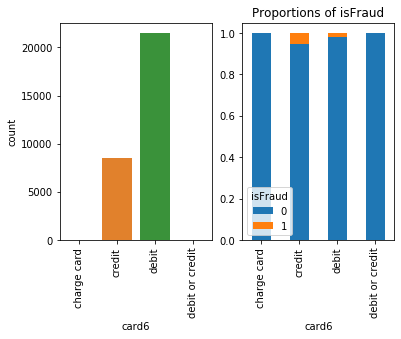

In [15]:
fig = plot_counts_and_proportion(train_transaction, x="card6", hue="isFraud")

### Continuous vars

In [22]:
X_train[continuous_vars].describe()

,C1,C10,C11,C12,C13,C14,C2,C3,C4,C5,...,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,15374.000000,15374.000000,15374.000000,15374.000000,15374.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,7.711667,0.857333,5.632708,0.288000,26.488292,5.861792,7.470500,0.014958,0.762042,5.128875,...,0.434305,0.452127,0.129960,0.131521,0.101860,0.229625,1.048625,0.428542,0.054042,0.555708
std,32.226161,9.117389,24.226064,2.432636,91.323989,21.874570,32.363582,0.139590,14.969135,23.803197,...,0.527717,0.567460,0.358552,0.365534,0.302474,0.806437,4.207394,1.639971,0.250746,1.683503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,2.000000,0.000000,12.000000,2.000000,3.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,749.000000,306.000000,590.000000,96.000000,873.000000,377.000000,825.000000,8.000000,551.000000,286.000000,...,4.000000,5.000000,5.000000,5.000000,1.000000,17.000000,86.000000,37.000000,5.000000,33.000000


In [97]:
describe = X_train[continuous_vars].describe()

![](imgs/transaction_DT.png)



A very important idea: it seems that train and test transaction dates don't overlap, so it would be prudent to use time-based split for validation. This was already noted in abother kernel: https://www.kaggle.com/robikscube/ieee-fraud-detection-first-look-and-eda


In [43]:
continuous_vars

Index(['C1', 'C10', 'C11', 'C12', 'C13', 'C14', 'C2', 'C3', 'C4', 'C5',
       ...
       'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99'],
      dtype='object', length=357)

In [79]:
correlations = []
valid_corr = []
for var in continuous_vars:
    corr = X_train[var].corr(y_train)
    if np.isnan(corr):
        print(f'\nVariable {var} values count')
        print(X_train[var].value_counts())
        print('Has no correlation')
    else:
        valid_corr.append(var)
        correlations.append(corr)
valid_corr = np.array(valid_corr)


Variable V107
1.0    24000
Name: V107, dtype: int64
Has no correlation

Variable V241
1.0    5946
Name: V241, dtype: int64
Has no correlation


In [122]:
corr_lim = .3
print(f' Variables with correlation higher than {corr_lim}\n {", ".join(list(valid_corr[np.abs(correlations) > corr_lim]))}')

 Variables with correlation higher than 0.3
 C12, V189, V201
